<a href="https://colab.research.google.com/github/sunon77/MLTransDyn/blob/master/MLP_002_Transformer_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To demonstrate how overparameterization affects different types of machine learning models transformers vs. logistic regression

We'll use a simple dataset and compare two types of models: a transformer model (which typically handles overparameterization well) and a more traditional model (like a logistic regression, which can struggle with overparameterization)

In [ ]:
! pip install accelerate -U

!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 932.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=336f3288280729ff55400f8181d00b36d7f7aebb2251bc5e9489387f4cf6541a
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the dataset (assuming `dataset` is a Hugging Face dataset object)
tokenized_dataset = dataset.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: ignored

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


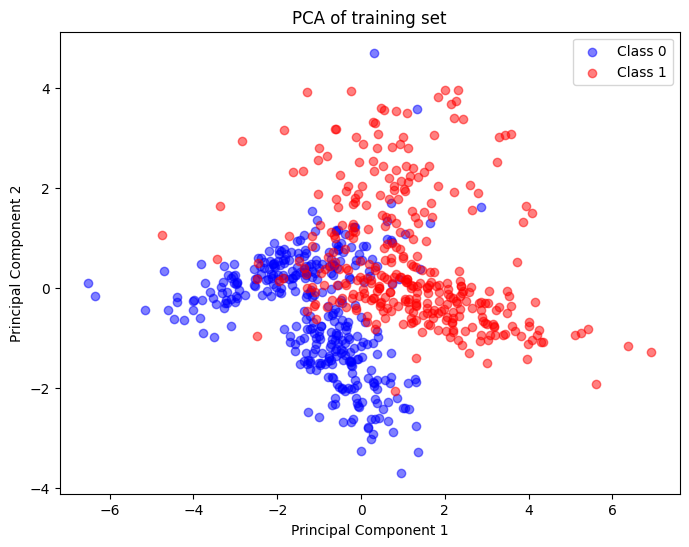

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame for the PCA-transformed data
df = pd.DataFrame(data = X_train_pca, columns = ['PC1', 'PC2'])
df['label'] = y_train

# Plot the PCA-transformed data
plt.figure(figsize=(8,6))
plt.scatter(df.loc[df['label'] == 0, 'PC1'], df.loc[df['label'] == 0, 'PC2'], color='blue', alpha=0.5, label='Class 0')
plt.scatter(df.loc[df['label'] == 1, 'PC1'], df.loc[df['label'] == 1, 'PC2'], color='red', alpha=0.5, label='Class 1')
plt.title('PCA of training set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


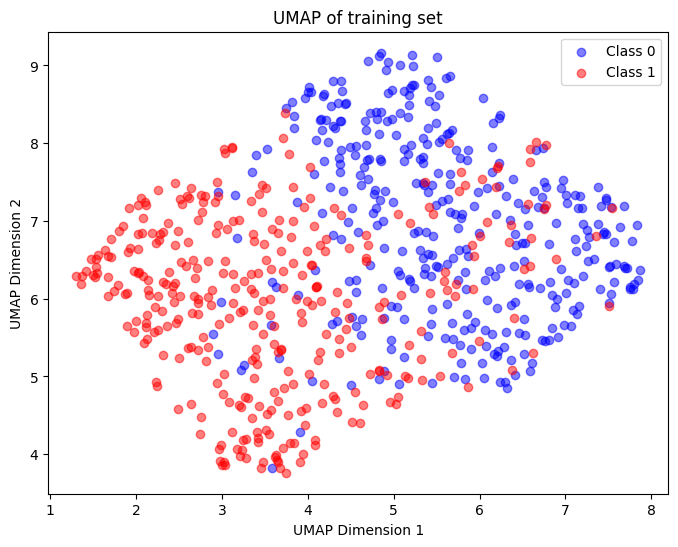

In [ ]:
import umap.umap_ as umap


# Perform UMAP dimension reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_train)

# Create a DataFrame for the UMAP-transformed data
df = pd.DataFrame(data = embedding, columns = ['UMAP1', 'UMAP2'])
df['label'] = y_train

# Plot the UMAP-transformed data
plt.figure(figsize=(8,6))
plt.scatter(df.loc[df['label'] == 0, 'UMAP1'], df.loc[df['label'] == 0, 'UMAP2'], color='blue', alpha=0.5, label='Class 0')
plt.scatter(df.loc[df['label'] == 1, 'UMAP1'], df.loc[df['label'] == 1, 'UMAP2'], color='red', alpha=0.5, label='Class 1')
plt.title('UMAP of training set')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

In [ ]:
import accelerate






1.   Generate a Dataset: We'll create a synthetic dataset suitable for a classification task.
2.   Create Models:
  A Transformer model, which we'll deliberately overparameterize.
  A Logistic Regression model, as an example of a traditional ML model.
1.   Train Both Models: We'll train both models on the same dataset.
2.   Evaluate and Compare: We'll evaluate both models and discuss the results.




Let's start with the code:

## Step 1: Generate a Dataset

In [ ]:
!pip show accelerate

Name: accelerate
Version: 0.25.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Create a transformer model (This is a simplification; normally, transformers require tokenization, etc.)
model_transformer = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model_transformer,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test
)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model_lr = LogisticRegression()


## Step 3: train both model

In [ ]:
# Train the transformer model
# trainer.train()

# Train the logistic regression model
model_lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleMLP(nn.Module):
    def __init__(self, input_size):
        super(SimpleMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 2)  # 2 output classes

    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        x = nn.functional.relu(self.layer2(x))
        return self.layer3(x)

model_mlp = SimpleMLP(input_size=X_train.shape[1])


In [ ]:
def train(model, criterion, optimizer, X_train, y_train, epochs=10000):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(torch.FloatTensor(X_train))
        loss = criterion(outputs, torch.LongTensor(y_train))
        loss.backward()
        optimizer.step()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)

# Train the model
train(model_mlp, criterion, optimizer, X_train, y_train)


## Step 4: Evaluate and Compare (with slight modification for MLP)

In [ ]:
# Evaluate the MLP model
model_mlp.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model_mlp(torch.FloatTensor(X_test))
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size
    correct += (predicted == torch.LongTensor(y_test)).sum().item()
accuracy_mlp = correct / total

# Evaluate the logistic regression model (remains the same)
accuracy_lr = model_lr.score(X_test, y_test)

print(f"MLP Model Accuracy: {accuracy_mlp}")
print(f"Logistic Regression Model Accuracy: {accuracy_lr}")


MLP Model Accuracy: 0.82
Logistic Regression Model Accuracy: 0.85
